Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an initial exploration of Dandiset 000673, which contains data for the study "Control of working memory by phase–amplitude coupling of human hippocampal neurons".

You can access this Dandiset on Neurosift:
https://neurosift.app/dandiset/000673

In this notebook, we will:
1. Load the Dandiset metadata using the DANDI API.
2. Load and visualize local field potential (LFP) data from one of the NWB files.
3. Load and display stimulus template images from the same NWB file.

This notebook is intended to help users get started with exploring the data in this Dandiset. It does not draw any scientific conclusions.

### Required packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`
*   `seaborn`

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 44 assets in the dataset

First 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb
- sub-12/sub-12_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-2_ecephys+image.nwb
- sub-10/sub-10_ses-1_ecephys+image.nwb


### Load an NWB file and show some metadata

In this section, we will load one of the NWB files in the Dandiset and show some metadata.

We will load the file `sub-1/sub-1_ses-1_ecephys+image.nwb`. The URL for this asset is:
https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


SBCAT_ID: 1
sub-1_ses-1_P55CS
2018-01-01 00:00:00-08:00


### Load and visualize LFP data

In this section, we will load and visualize LFP data from the NWB file.

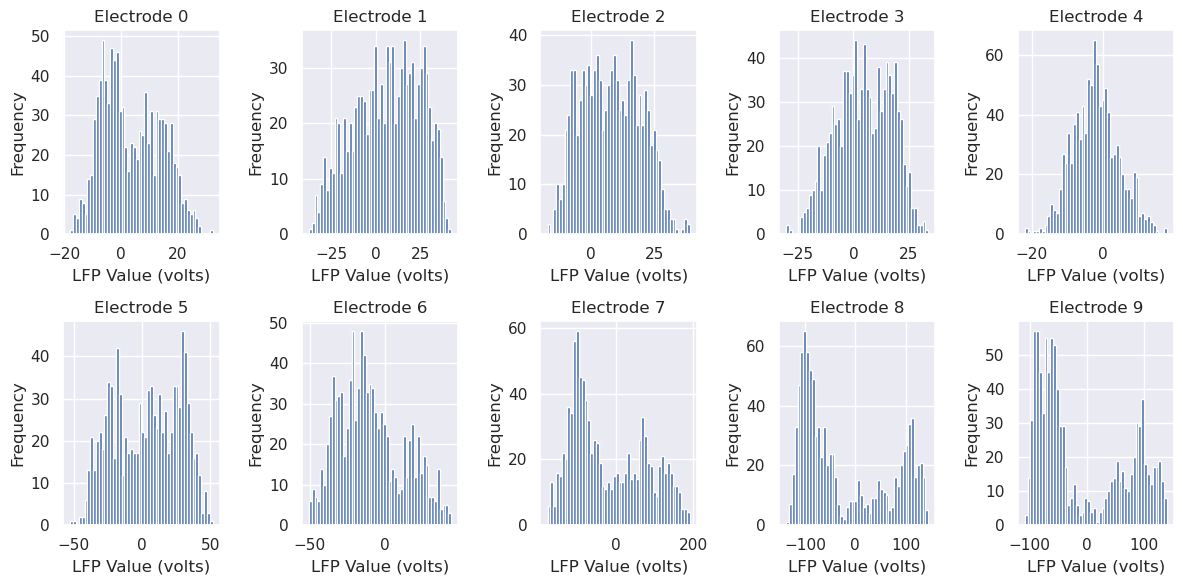

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

# Access the LFP data
lfps = nwb.acquisition["LFPs"]
data = lfps.data
electrodes = lfps.electrodes.table.to_dataframe()

# Select a subset of electrodes
num_electrodes = min(10, len(electrodes))
electrode_ids = electrodes.index[:num_electrodes]

# Select a subset of time points
num_time_points = min(1000, data.shape[0])

# Extract LFP data for these electrodes
lfp_data = data[:num_time_points, electrode_ids]

# Plot the distribution of LFP values for each electrode using histograms
plt.figure(figsize=(12, 6))
for i, electrode_id in enumerate(electrode_ids):
    plt.subplot(2, 5, i + 1)
    plt.hist(lfp_data[:, i], bins=50)
    plt.title(f"Electrode {electrode_id}")
    plt.xlabel("LFP Value (volts)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Load and visualize stimulus templates

In this section, we will load and visualize stimulus templates from the NWB file.

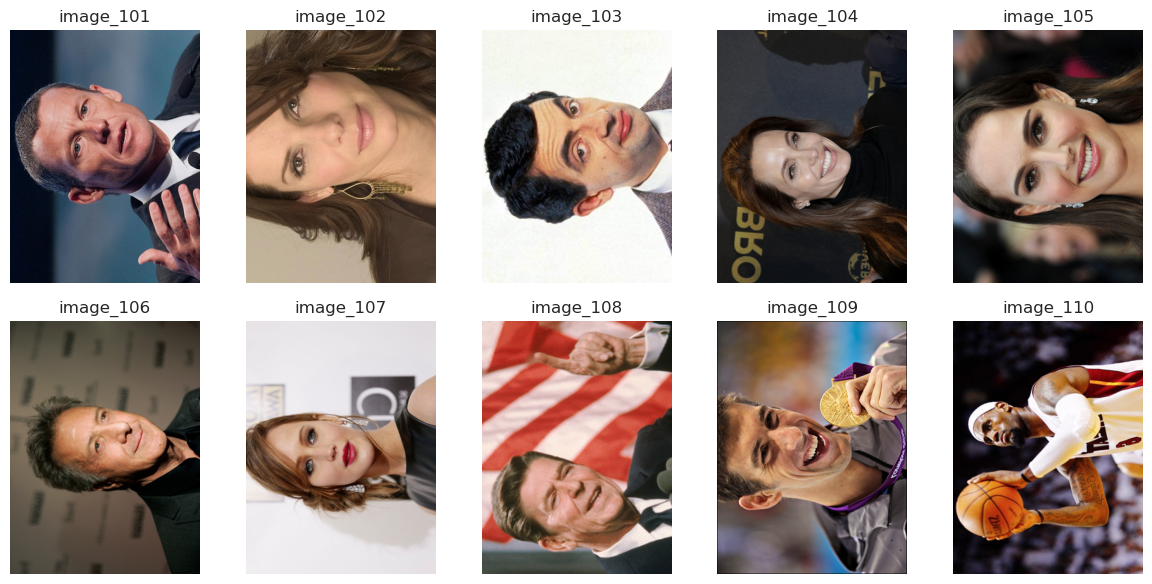

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Access the stimulus templates
stimulus_templates = nwb.stimulus_template["StimulusTemplates"].images

# Select a subset of images
num_images = min(10, len(stimulus_templates))
image_names = list(stimulus_templates.keys())[:num_images]

# Plot these images in a grid
plt.figure(figsize=(12, 6))
for i, image_name in enumerate(image_names):
    plt.subplot(2, 5, i + 1)
    image_data = stimulus_templates[image_name].data[:]
    image = Image.fromarray(image_data)
    plt.imshow(image)
    plt.title(image_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

### Summary and future directions

In this notebook, we have shown how to load and visualize LFP data and stimulus templates from an NWB file in Dandiset 000673.

Possible future directions for analysis include:

*   Performing more advanced signal processing on the LFP data.
*   Investigating the relationship between LFP activity and stimulus presentation.
*   Exploring other data modalities in the NWB file, such as spike times and trial information.